# Tarea valuación relativa
### Andrés Nieto Guadarrama
### 000119266

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura y limpieza de datos

In [67]:
df_bonos=pd.read_csv("Base.csv")
df_bonos2=pd.read_csv("Base.csv")

A continuación se restringen las filas de la base para trabajar con ella.

In [69]:
df_bonos2=df_bonos2.iloc[4:len(df_bonos2)-1]
llaves=df_bonos2.keys()
llaves=llaves[1:]

for i in range(len(list(df_bonos2.index))):
    for l in llaves:
        if type(df_bonos2[l].iloc[i])==str:
            df_bonos2[l].iloc[i]=float(df_bonos2[l].iloc[i].replace(",",""))

In [59]:
df_bonos.head(5)

,TICKER,MXBRBA Index,MXIBTIIE Index,MXIB91DT Index,MPSWC Curncy,MPSWF Curncy,MPSWI Curncy,MPSW1A SINV Curncy,MPSW2B Curncy,MPSW3C Curncy,...,MXN1M BGN Curncy,MXN2M BGN Curncy,MXN3M BGN Curncy,MXN4M BGN Curncy,MXN5M BGN Curncy,MXN6M BGN Curncy,MXN9M BGN Curncy,MXN12M BGN Curncy,MXN18M BGN Curncy,MXN2Y BGN Curncy
0,SHORT_NAME,Bank Rate,MEXICAN INTERBANK TIIP&TII TI,Mexico Deposit TIIE 91D,MXN SWAP MTH (vs 28D) 3M,MXN SWAP MTH (vs 28D) 6M,MXN SWAP MTH (vs 28D) 9M,MXN SWAP MTH (v 28D) 13M,MXN SWAP MTH (v 28D) 26M,MXN SWAP MTH (v 28D) 39M,...,MEXICAN PESO 1 MO,MEXICAN PESO 2 MO,MEXICAN PESO 3 MO,MEXICAN PESO 4 MO,MEXICAN PESO 5 MO,MEXICAN PESO 6 MO,MEXICAN PESO 9 MO,MEXICAN PESO 12MO,MEXICAN PESO 18MO,MEXICAN PESO 2 YR
1,NAME,Mexico Official Overnight Clos,Mexico Interbank TIIE 28 Day,Mexico Interbank TIIE 91 Day,MXN SWAP MTH (vs 28D) 3M,MXN SWAP MTH (vs 28D) 6M,MXN SWAP MTH (vs 28D) 9M,MXN SWAP MTH (v 28D) 13M,MXN SWAP MTH (v 28D) 26M,MXN SWAP MTH (v 28D) 39M,...,MEXICAN PESO 1 MO,MEXICAN PESO 2 MO,MEXICAN PESO 3 MO,MEXICAN PESO 4 MO,MEXICAN PESO 5 MO,MEXICAN PESO 6 MO,MEXICAN PESO 9 MO,MEXICAN PESO 12MO,MEXICAN PESO 18MO,MEXICAN PESO 2 YR
2,LONG COMP NAME,Mexico Official Overnight Closing Bank Rate,Mexico Interbank TIIE 28 Day,Mexico Interbank TIIE 91 Day,MXN SWAP MTH (vs 28D) 3M,MXN SWAP MTH (vs 28D) 6M,MXN SWAP MTH (vs 28D) 9M,MXN SWAP MTH (v 28D) 13M,MXN SWAP MTH (v 28D) 26M,MXN SWAP MTH (v 28D) 39M,...,USDMXN 1 Month Forward Points,USDMXN 2 Month Forward Points,USDMXN 3 Month Forward Points,USDMXN 4 Month Forward Points,USDMXN 5 Month Forward Points,USDMXN 6 Month Forward Points,USDMXN 9 Month Forward Points,USDMXN 12 Month Forward Points,USDMXN 18 Month Forward Points,USDMXN 2 Year Forward Points
3,1,2,3,4,11,12,13,14,15,16,...,235,236,237,238,239,240,241,242,243,244
4,31/dic/05,8.27,8.57,8.28,8.33,8.28,8.21,8.21,8.21,8.33,...,406.00,713.00,"1,013.00",NaN,NaN,"1,945.00","2,875.00","3,850.00","5,775.00","7,800.00"


# Graficación de curva de bonos

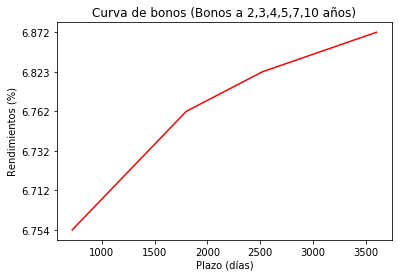

In [137]:
yield_curve_tickers=[]
llaves=df_bonos.keys()
for i in range(len(df_bonos.iloc[2])):
    if df_bonos.iloc[2][i].lower().find("yield")>=0:
        yield_curve_tickers.append(i)

curve=[df_bonos[llaves[y]].iloc[-2] for y in yield_curve_tickers]
plt.figure()
plt.title("Curva de bonos (Bonos a 2,3,4,5,7,10 años)")
plt.plot([360*i for i in [2,3,4,5,7,10]],curve,color='r')
plt.xlabel("Plazo (días)")
plt.ylabel("Rendimientos (%)")
plt.show()

### Bootstraping

In [205]:
plazos=[360*i for i in [2,3,4,5,7,10]]
llaves=df_bonos2.keys()
r=[df_bonos2[llaves[y]].iloc[i] for i in range(4,len(df_bonos2))]
d=df_bonos2[llaves[y]].iloc[3]

def factor_descuento(r,N,d):
    F=[]
    for i in range(len(r)):
        F.append(1/(1+(r[i]/100)*N/360)**(i-d/N))
    return F 

def precio_limpio_bonos(VN,d,N,TC,r):
    F=factor_descuento(r,N,d)
    C=VN*(N*(TC/100)/360)
    C=C*np.ones(len(F))
    p=np.sum(C*np.array(F))+F[-1]*VN-d*C[0]/N
    return p,F

for y in yield_curve_tickers:
    r=[]
    N=plazos[y-yield_curve_tickers[0]]
    x=df_bonos2[llaves[y]][df_bonos2[llaves[y]].isnull()==False]
    for i in range(int((len(x)-1)/(N/180)),len(x),int((len(x)-1)/(N/180))):
        r.append(x.loc[list(x.index)[i-int((len(x)-1)/(N/180)):i]].mean())
    d=float(df_bonos[llaves[y]].iloc[3])
    TC=x.iloc[0]
    p_l,F=precio_limpio_bonos(100,d,N,TC,r)
    print(f"precio limpio de {llaves[y]}: {p_l}")

precio limpio de BV020476 BVAL Index: 103.55502249265265
precio limpio de BV030476 BVAL Index: 111.48108758572356
precio limpio de BV040476 BVAL Index: 126.99169017188795
precio limpio de BV050476 BVAL Index: 144.2215646142861
precio limpio de BV070476 BVAL Index: 172.1087186078522
precio limpio de BV100476 BVAL Index: 201.86317833172117


### Creación de lista de parejas de tickers

El código a continuación creará una lista con las parejas de los nombres de los tickers sin repetirse (de longitud $C(76,2)\,=\,$2850) eliminando los instrumentos que deseamos excluír del análisis.

In [70]:
parejas=[]
llaves=list(df_bonos2.keys())
llaves=llaves[1:]
j=1
for t in llaves:
    if t.upper().find('USD-MXN X-RATE')==-1 and df_bonos[t].iloc[2].lower().find('forward points')==-1:
        for i in range(j,len(llaves)):
            if llaves[j].upper().find('USD-MXN X-RATE')==-1 and df_bonos[llaves[j]].iloc[2].lower().find('forward points')==-1:
                parejas.append([t,llaves[i]])
    j+=1

### Valuación Relativa

El siguiente código compara las diferentes parejas de tickers de interés comparando su spread actual con su media histórica para determinar cuál es el más atractivo.

In [167]:
def evalua(p):
    spread=df_bonos2[p[0]]-df_bonos2[p[1]]
    mediana=spread.quantile(.5)
    if spread.iloc[-1]< mediana:
        return 0,spread.iloc[-1]
    else:
        return 1,spread.iloc[-1]

In [168]:
comparacion=[]
spread=[]
resultado=[]
for p in parejas:
    ev,s=evalua(p)
    comparacion.append(p[0]+' vs '+p[1])
    spread.append(s)
    resultado.append('El ticker más atractivo es: '+p[ev])
df_resultado=pd.DataFrame({'Instrumentos':comparacion,'Spread Actual':spread,'Resultado':resultado})

In [169]:
df_resultado.head(5)

,Instrumentos,Spread Actual,Resultado
0,MXBRBA Index vs MXIBTIIE Index,-0.2275,El ticker más atractivo es: MXIBTIIE Index
1,MXBRBA Index vs MXIB91DT Index,-0.1380,El ticker más atractivo es: MXIB91DT Index
2,MXBRBA Index vs MPSWC Curncy,-0.1400,El ticker más atractivo es: MPSWC Curncy
3,MXBRBA Index vs MPSWF Curncy,0.0300,El ticker más atractivo es: MPSWF Curncy
4,MXBRBA Index vs MPSWI Curncy,0.2000,El ticker más atractivo es: MPSWI Curncy
